## Importing the libraries

In [1]:
import matplotlib.pyplot as plt

In [2]:
import nltk

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [4]:
from nltk.corpus import stopwords

In [5]:
from nltk.stem import WordNetLemmatizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
import sklearn.model_selection
import sklearn.preprocessing as preproc

In [10]:
from sklearn.feature_extraction import text

In [11]:
import pickle

In [12]:
import warnings
warnings.filterwarnings("ignore")

## Inspecting Dataset

In [15]:
df = pd.read_excel('C:/Users/HP/Desktop/tweets_no_null.xlsx')

In [16]:
df

,Unnamed: 0,ID,text,user,location,Labels
0,0,0,IndiaFightsCorona Our support can boost the m...,ROBBhopal,"Bhopal, India",1
1,1,1,Stay safe! Wear a face mask when you head out....,TrishaHospital,"Ahmadabad City, India",1
2,2,2,SocialDistancing sign I made at 81-year-old Ka...,WilsonLeeFlores,"Metro Manila, Philippines",0
3,3,3,When you can’t get out of your driveway becaus...,WeAreMemories,"SW Devon, GB",0
4,4,4,La Trahison des Images / The Treachery of Poli...,SusannaGianand1,india,0
...,...,...,...,...,...,...
19995,19995,19995,_in KicchaSudeep drove from Bangalore to Hyder...,01Aru01,Banglore,1
19996,19996,19996,KicchaSudeep drove from Bangalore to Hyderaba...,badshah_fans,"Bengaluru South, India",1
19997,19997,19997,E be like say I go get more than one fave ooo ...,jonzenone,Lagos Nigeria,1
19998,19998,19998,Today's Vibes👆🏿 ❤💛💚🖤 Brought to you from 🔥🔥🔥O...,urban_rastaman,"Orlando, Florida",1


In [17]:
df.head()

,Unnamed: 0,ID,text,user,location,Labels
0,0,0,IndiaFightsCorona Our support can boost the m...,ROBBhopal,"Bhopal, India",1
1,1,1,Stay safe! Wear a face mask when you head out....,TrishaHospital,"Ahmadabad City, India",1
2,2,2,SocialDistancing sign I made at 81-year-old Ka...,WilsonLeeFlores,"Metro Manila, Philippines",0
3,3,3,When you can’t get out of your driveway becaus...,WeAreMemories,"SW Devon, GB",0
4,4,4,La Trahison des Images / The Treachery of Poli...,SusannaGianand1,india,0


In [18]:
df.tail()

,Unnamed: 0,ID,text,user,location,Labels
19995,19995,19995,_in KicchaSudeep drove from Bangalore to Hyder...,01Aru01,Banglore,1
19996,19996,19996,KicchaSudeep drove from Bangalore to Hyderaba...,badshah_fans,"Bengaluru South, India",1
19997,19997,19997,E be like say I go get more than one fave ooo ...,jonzenone,Lagos Nigeria,1
19998,19998,19998,Today's Vibes👆🏿 ❤💛💚🖤 Brought to you from 🔥🔥🔥O...,urban_rastaman,"Orlando, Florida",1
19999,19999,19999,_ NEW BLOG!✍️Natasha Trotman () shares with us...,janepcchang,india,1


In [19]:
df.shape

(20000, 6)

In [20]:
df.drop_duplicates(subset={'text', 'user', 'location'}, inplace=True)

In [21]:
df.shape

(19120, 6)

<IPython.core.display.Javascript object>


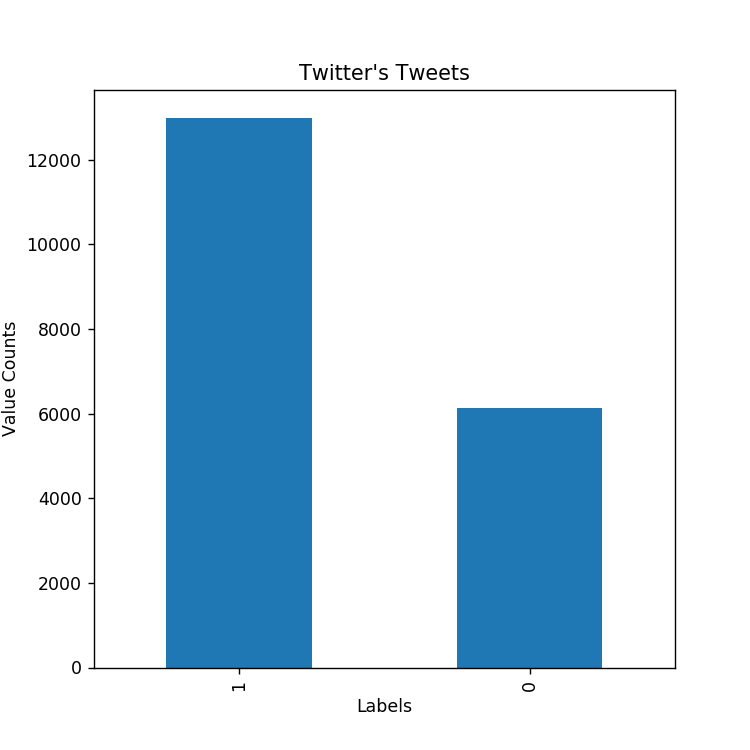

In [22]:
ax = df['Labels'].value_counts().plot(kind='bar', figsize=(6,6))
fig = ax.get_figure()
ax.set_title("Twitter's Tweets")
ax.set_xlabel('Labels')
ax.set_ylabel('Value Counts');

## Text Preprocessing

In [23]:
# A list of contractions 
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [24]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    # Tokenize each word
    text =  nltk.WordPunctTokenizer().tokenize(text)
        
    return text

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
df['Text_Cleaned'] = list(map(clean_text, df.text))

In [27]:
df.head()

,Unnamed: 0,ID,text,user,location,Labels,Text_Cleaned
0,0,0,IndiaFightsCorona Our support can boost the m...,ROBBhopal,"Bhopal, India",1,"[indiafightscorona, support, boost, morale, se..."
1,1,1,Stay safe! Wear a face mask when you head out....,TrishaHospital,"Ahmadabad City, India",1,"[stay, safe, wear, face, mask, head, wearmask,..."
2,2,2,SocialDistancing sign I made at 81-year-old Ka...,WilsonLeeFlores,"Metro Manila, Philippines",0,"[socialdistancing, sign, made, 81, year, old, ..."
3,3,3,When you can’t get out of your driveway becaus...,WeAreMemories,"SW Devon, GB",0,"[can, ’, t, get, driveway, que, beach, 3, deep..."
4,4,4,La Trahison des Images / The Treachery of Poli...,SusannaGianand1,india,0,"[la, trahison, des, images, treachery, politic..."


In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
def lemmatized_words(text):
    lemm = nltk.stem.WordNetLemmatizer()
    df['lemmatized_text'] = list(map(lambda word:
                                     list(map(lemm.lemmatize, word)),
                                     df.Text_Cleaned))
    

lemmatized_words(df.Text_Cleaned)

In [30]:
df.head(5)

,Unnamed: 0,ID,text,user,location,Labels,Text_Cleaned,lemmatized_text
0,0,0,IndiaFightsCorona Our support can boost the m...,ROBBhopal,"Bhopal, India",1,"[indiafightscorona, support, boost, morale, se...","[indiafightscorona, support, boost, morale, se..."
1,1,1,Stay safe! Wear a face mask when you head out....,TrishaHospital,"Ahmadabad City, India",1,"[stay, safe, wear, face, mask, head, wearmask,...","[stay, safe, wear, face, mask, head, wearmask,..."
2,2,2,SocialDistancing sign I made at 81-year-old Ka...,WilsonLeeFlores,"Metro Manila, Philippines",0,"[socialdistancing, sign, made, 81, year, old, ...","[socialdistancing, sign, made, 81, year, old, ..."
3,3,3,When you can’t get out of your driveway becaus...,WeAreMemories,"SW Devon, GB",0,"[can, ’, t, get, driveway, que, beach, 3, deep...","[can, ’, t, get, driveway, que, beach, 3, deep..."
4,4,4,La Trahison des Images / The Treachery of Poli...,SusannaGianand1,india,0,"[la, trahison, des, images, treachery, politic...","[la, trahison, de, image, treachery, politics,..."


In [31]:
pd.set_option('max_colwidth', 500)
df[['text','user', 'Labels', 'Text_Cleaned', 'lemmatized_text']].sample(3)

,text,user,Labels,Text_Cleaned,lemmatized_text
2065,One of highlights of our Lockdown walks in Ullapool has been hearing &amp; getting occasional glimpses of Whitethroat…,FinlayPringle,1,"[one, highlights, lockdown, walks, ullapool, hearing, getting, occasional, glimpses, whitethroat, …]","[one, highlight, lockdown, walk, ullapool, hearing, getting, occasional, glimpse, whitethroat, …]"
17672,Because we continue to hope that these crazy times will pass and everybody needs some sunday break from reality!…,roshni_sj5,1,"[continue, hope, crazy, times, pass, everybody, needs, sunday, break, reality, …]","[continue, hope, crazy, time, pas, everybody, need, sunday, break, reality, …]"
15846,Till when will it continue? 😔 lockdown,_utkarsh_s_,1,"[till, continue, 😔, lockdown]","[till, continue, 😔, lockdown]"


In [32]:
bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = bow_converter.fit_transform(df['Text_Cleaned'])

words = bow_converter.get_feature_names()
len(words)

23428

In [33]:
bigram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[2,2], lowercase=False) 
x2 = bigram_converter.fit_transform(df['Text_Cleaned'])
bigrams = bigram_converter.get_feature_names()
len(bigrams)

87982

In [34]:
bigrams[-10:]

['🧡 photographer',
 '🧤 👍👍',
 '🧤 👍👍…',
 '🧪 quarantine',
 '🧵 communist',
 '🧵 quite',
 '🧹 lockdownsa',
 '🧻 3',
 '🧽 🌡️',
 '\U0001fa81🏝 vlog']

In [35]:
trigram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False) 
x3 = trigram_converter.fit_transform(df['Text_Cleaned'])
trigrams = trigram_converter.get_feature_names()
len(trigrams)

96661

In [36]:
trigrams[:10]

['0 0 …',
 '0 055 99',
 '0 2 90',
 '0 2020 covid19',
 '0 24 thursday',
 '0 49 half',
 '0 74 pakistan',
 '0 8 1',
 '0 80 000',
 '0 bearable it']

In [37]:
print(len(words), len(bigrams), len(trigrams))

23428 87982 96661


<IPython.core.display.Javascript object>


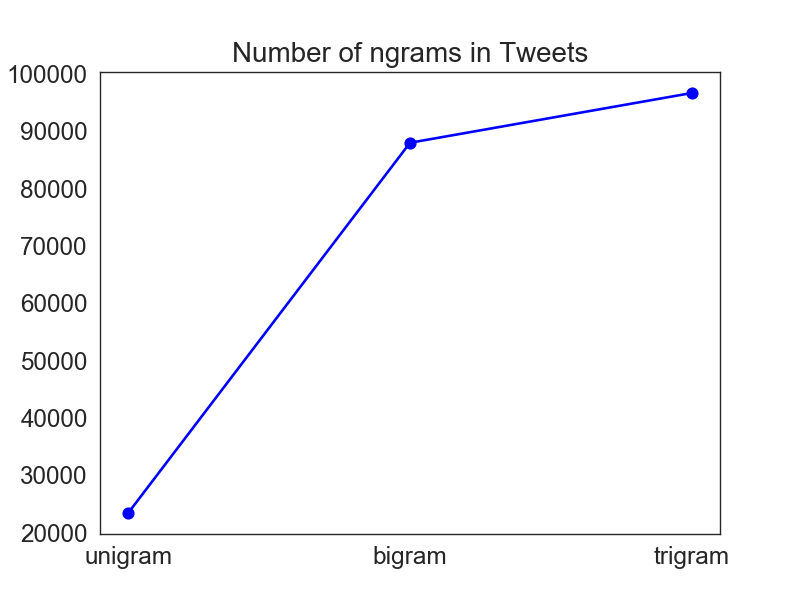

In [38]:
sns.set_style("white")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='blue')
plt.plot(counts, 'bo')
#plt.margins(0.1)
plt.ticklabel_format(style = 'plain')
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in Tweets', {'fontsize':16})
plt.show()

## Bag of Words Transformation

In [39]:
training_data, test_data = sklearn.model_selection.train_test_split(df, train_size = 0.7, random_state=42)

In [40]:
print(training_data.shape)
print(test_data.shape)

(13384, 8)
(5736, 8)


In [41]:
bow_transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False)

In [42]:
X_tr_bow = bow_transform.fit_transform(training_data['Text_Cleaned'])

In [43]:
len(bow_transform.vocabulary_)

73967

In [44]:
X_tr_bow.shape

(13384, 73967)

In [45]:
X_te_bow = bow_transform.transform(test_data['Text_Cleaned'])

In [46]:
y_tr = training_data['Labels']
y_te = test_data['Labels']

In [47]:
y_tr

17973    0
16493    1
1262     0
15620    0
14214    1
        ..
11509    1
12204    1
5472     1
891      0
16118    1
Name: Labels, Length: 13384, dtype: int64

In [48]:
y_te

7896     1
19724    1
8049     0
19379    1
3717     0
        ..
16949    0
15068    1
11042    1
5872     1
4202     1
Name: Labels, Length: 5736, dtype: int64

## Tf-Idf Transformation

In [49]:
tfidf_transform = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_transform.fit_transform(X_tr_bow)

In [50]:
X_te_tfidf = tfidf_transform.transform(X_te_bow)

## Classification with Logistic Regression 

In [51]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    model = LogisticRegression(C=_C).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    return model

In [52]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test Score with bow features 0.8016039051603905
Test Score with tf-idf features 0.7928870292887029


In [53]:
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
bow_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
tfidf_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_grid_)

In [54]:
bow_search.fit(X_tr_bow, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
bow_search.best_score_

0.7986401673640168

In [56]:
tfidf_search.fit(X_tr_tfidf, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
tfidf_search.best_score_

0.7985654512851166

In [58]:
bow_search.best_params_

{'C': 10.0}

In [59]:
tfidf_search.best_params_

{'C': 0.1}

In [60]:
bow_search.cv_results_

{'mean_fit_time': array([0.02786541, 0.02532644, 0.03809819, 0.07081041, 0.13324389,
        0.40990391]),
 'std_fit_time': array([0.01490594, 0.00214126, 0.00146584, 0.00260018, 0.00522419,
        0.13285071]),
 'mean_score_time': array([0.00120239, 0.00100913, 0.00099792, 0.00079789, 0.0009973 ,
        0.0009974 ]),
 'std_score_time': array([3.95108702e-04, 1.46797709e-05, 1.24891289e-06, 3.98946104e-04,
        1.50789149e-07, 6.30826665e-04]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.67737117, 0.67737117, 0.78043316, 0.80358476, 0.80507842,
        0.80097087]),
 'split1_test_score': array([0.67725065, 0.67725065, 0.76503549, 0.79230482, 0.79417258,
        0.67874486]),
 'split2_test_score': array([0.6772506

In [61]:
results_file = open('tfidf_gridcv_results.pkl', 'wb')
pickle.dump(bow_search, results_file, -1)
pickle.dump(tfidf_search, results_file, -1)
results_file.close()

In [62]:
pkl_file = open('tfidf_gridcv_results.pkl', 'rb')
bow_search = pickle.load(pkl_file)
tfidf_search = pickle.load(pkl_file)
pkl_file.close()

In [63]:
search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score'],
                               'tfidf': tfidf_search.cv_results_['mean_test_score']})
search_results

,bow,tfidf
0,0.677376,0.739839
1,0.677376,0.779961
2,0.771668,0.798565
3,0.797445,0.773311
4,0.798640,0.656455
5,0.746563,0.656157


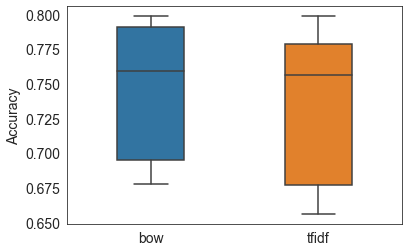

In [64]:
%matplotlib inline
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)
plt.savefig('tfidf_gridcv_results.png')

In [65]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', 
                              _C=bow_search.best_params_['C'])
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf', 
                              _C=tfidf_search.best_params_['C'])

Test Score with bow features 0.7988145048814504
Test Score with tf-idf features 0.7995118549511855
